In [1]:
import mysql.connector
import config
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib

cnx = mysql.connector.connect(
      host = config.my_cred['host'],
      user = config.my_cred['user'],
      passwd = config.my_cred['pw']
)
print(cnx)

Using matplotlib backend: MacOSX


In [2]:
page = requests.get("https://www.boxofficemojo.com/year/world/2019/")
page

<Response [200]>

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')


In [4]:
a_attr = soup.find_all('a', class_='a-link-normal')
def movie_names(attr):
    movie_names = []

    for a in attr:
        movie_names.append(a.get_text())   
    return movie_names

In [5]:
###parse through box office data to only return movie names
def clean_movie_names(box_office_data):
    new_list = []
    for data in box_office_data:
        if data not in ('', 'Worldwide', 'Domestic', '%', 'Foreign', 'News', 'Daily', 'Weekend', 'International', 'All Time', 'Rank', 'Calendar', 'Showdowns','Help','IMDb','Conditions of Use', 'Privacy Policy'):
            new_list.append(data)
    return new_list

In [6]:
revenue = soup.find_all('td', class_ = 'a-text-right mojo-field-type-money')
def worldwide_rev(revenue):   
    rev_by_movie = []
    
    for rev in revenue:
        rev_by_movie.append(rev.get_text())
    
    worldwide_int_rev = []

    for idx, rev in enumerate(rev_by_movie):
        rev = rev.replace(',', '')
        rev = rev.replace('$', '')
        rev = int(rev.replace('-', '0'))
        
        if idx % 3 == 0:    
            worldwide_int_rev.append(rev)
    worldwide_int_rev
        
    return worldwide_int_rev


In [7]:
def movie_rev(movie_list, revenues):
    movies = movie_names(movie_list)
    cleaned_movies = clean_movie_names(movies)
    revenue_by_movie = worldwide_rev(revenues)
    
    
    return list(zip(cleaned_movies, revenue_by_movie))
    
    

In [8]:
movies_2019 = movie_rev(a_attr, revenue)


In [9]:
page = requests.get("https://www.boxofficemojo.com/year/world/2018/")
soup = BeautifulSoup(page.content, 'html.parser')
names_2018 = soup.find_all('a', class_='a-link-normal')
revenue_2018 = soup.find_all('td', class_ = 'a-text-right mojo-field-type-money')
movies_2018 = movie_rev(names_2018, revenue_2018)

In [10]:
page = requests.get("https://www.boxofficemojo.com/year/world/2017/")
soup = BeautifulSoup(page.content, 'html.parser')
names_2017 = soup.find_all('a', class_='a-link-normal')
revenue_2017 = soup.find_all('td', class_ = 'a-text-right mojo-field-type-money')
movies_2017 = movie_rev(names_2017, revenue_2017)

In [11]:
page = requests.get("https://www.boxofficemojo.com/year/world/2016/")
soup = BeautifulSoup(page.content, 'html.parser')
names_2016 = soup.find_all('a', class_='a-link-normal')
revenue_2016 = soup.find_all('td', class_ = 'a-text-right mojo-field-type-money')
movies_2016 = movie_rev(names_2016, revenue_2016)

In [12]:
page = requests.get("https://www.boxofficemojo.com/year/world/2015/")
soup = BeautifulSoup(page.content, 'html.parser')
names_2015 = soup.find_all('a', class_='a-link-normal')
revenue_2015 = soup.find_all('td', class_ = 'a-text-right mojo-field-type-money')
movies_2015 = movie_rev(names_2015, revenue_2015)

In [127]:
top_100_2019 = movies_2019[:100]
top_100_2018 = movies_2018[:100]
top_100_2017 = movies_2017[:100]
top_100_2016 = movies_2016[:100]
top_100_2015 = movies_2015[:100]

top_500 = top_100_2019 + top_100_2018 + top_100_2017 + top_100_2016 + top_100_2015

df1.columns=['movie','revenue', 'year']
df2.columns=['movie','revenue', 'year']
df3.columns=['movie','revenue', 'year']
df4.columns=['movie','revenue', 'year']
df5.columns=['movie','revenue', 'year']

df1 = pd.DataFrame(top_100_2015)
df1['year'] = 2015
df2 = pd.DataFrame(top_100_2016)
df2['year'] = 2016
df3 = pd.DataFrame(top_100_2017)
df3['year'] = 2017
df4 = pd.DataFrame(top_100_2018)
df4['year'] = 2018
df5 = pd.DataFrame(top_100_2019)
df5['year'] = 2019


In [124]:
df1.columns=['movie','revenue', 'year']
df2.columns=['movie','revenue', 'year']
df3.columns=['movie','revenue', 'year']
df4.columns=['movie','revenue', 'year']
df5.columns=['movie','revenue', 'year']

,0,1,year
0,Star Wars: Episode VIII - The Last Jedi,1332539889,2017
1,Beauty and the Beast,1263521126,2017
2,The Fate of the Furious,1236005118,2017
3,Despicable Me 3,1034799409,2017
4,Jumanji: Welcome to the Jungle,962077546,2017
5,Spider-Man: Homecoming,880166924,2017
6,Wolf Warrior 2,870325439,2017
7,Guardians of the Galaxy Vol. 2,863756051,2017
8,Thor: Ragnarok,853977126,2017
9,Wonder Woman,821847012,2017


Text(0.5, 1.0, 'Top Grossing 2015')

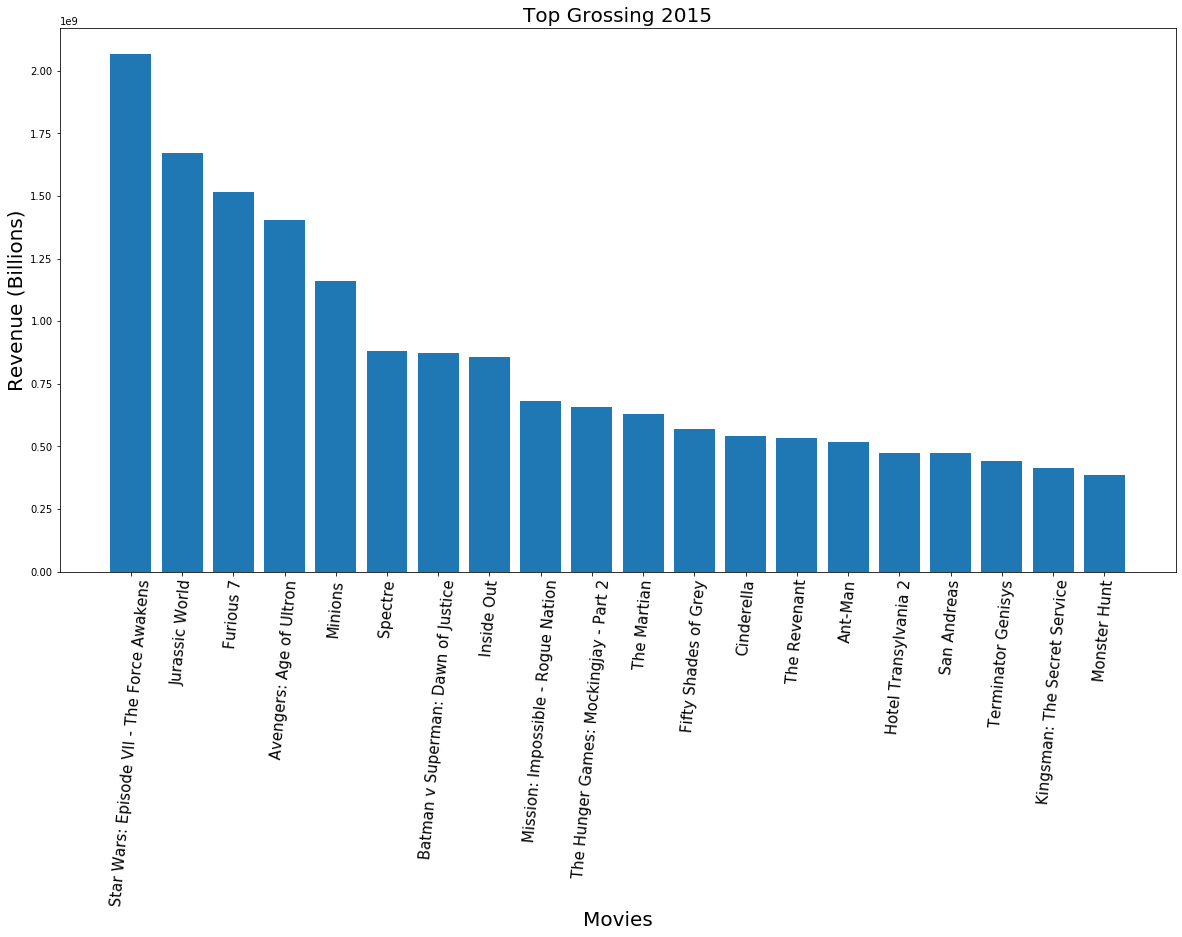

In [153]:
y1=df1[1][:20]
x1=df1[0][:20]
plt.figure(figsize=(20,10))
plt.bar(x1,y1)
plt.xticks(rotation=85, fontsize = 15)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Revenue (Billions)', fontsize = 20)
plt.title('Top Grossing 2015', fontsize = 20)
# r=list(range(0,20))
# label=y1

# for i in range(len(r)):
#     plt.text(x=r[i]+3,y=label[i]+22,s=x1[i])

In [102]:
#2016



Text(0.5, 1.0, 'Top Grossing 2016')

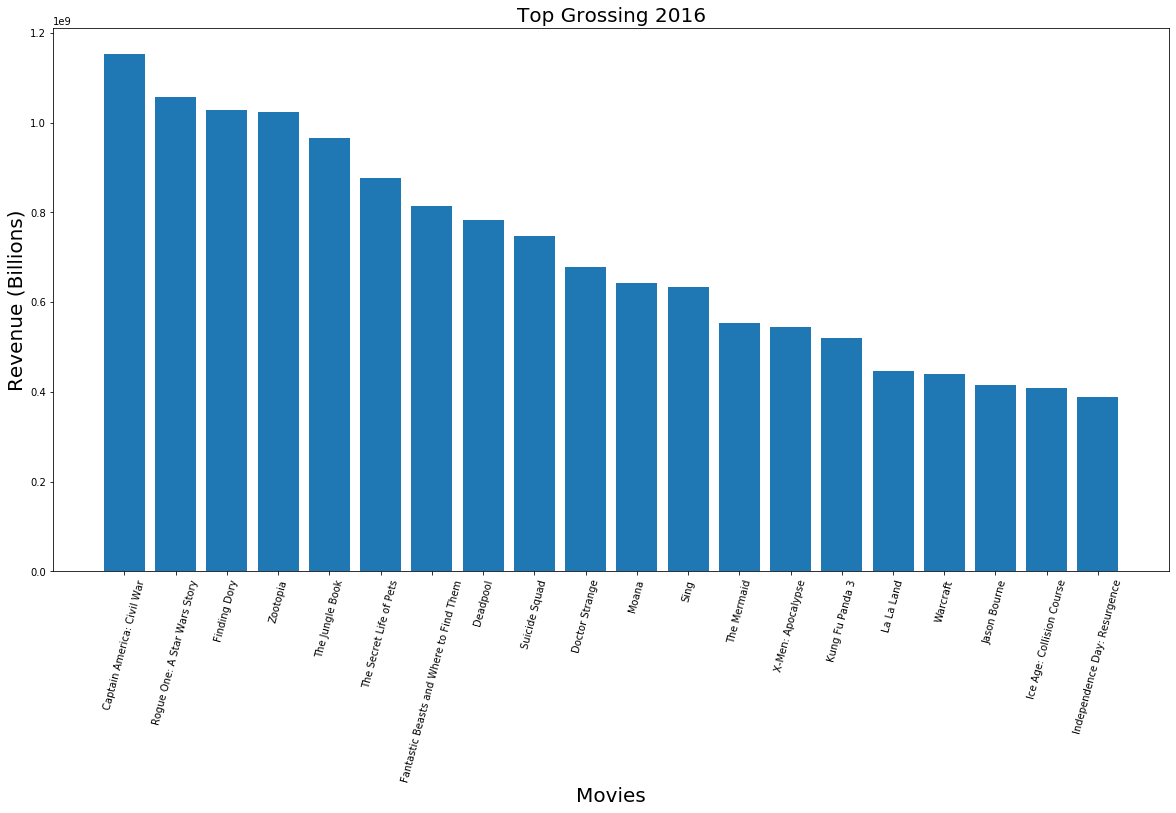

In [145]:
y2=df2[1][:20]
x2=df2[0][:20]
plt.figure(figsize=(20,10))
plt.bar(x2,y2)
plt.xticks(rotation=75)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Revenue (Billions)', fontsize = 20)
plt.title('Top Grossing 2016', fontsize = 20)

In [132]:
df3[1]

0     1332539889
1     1263521126
2     1236005118
3     1034799409
4      962077546
         ...    
95      58815633
96      57628292
97      56996304
98      56411585
99      55972241
Name: 1, Length: 100, dtype: int64

Text(0.5, 1.0, 'Top Grossing 2017')

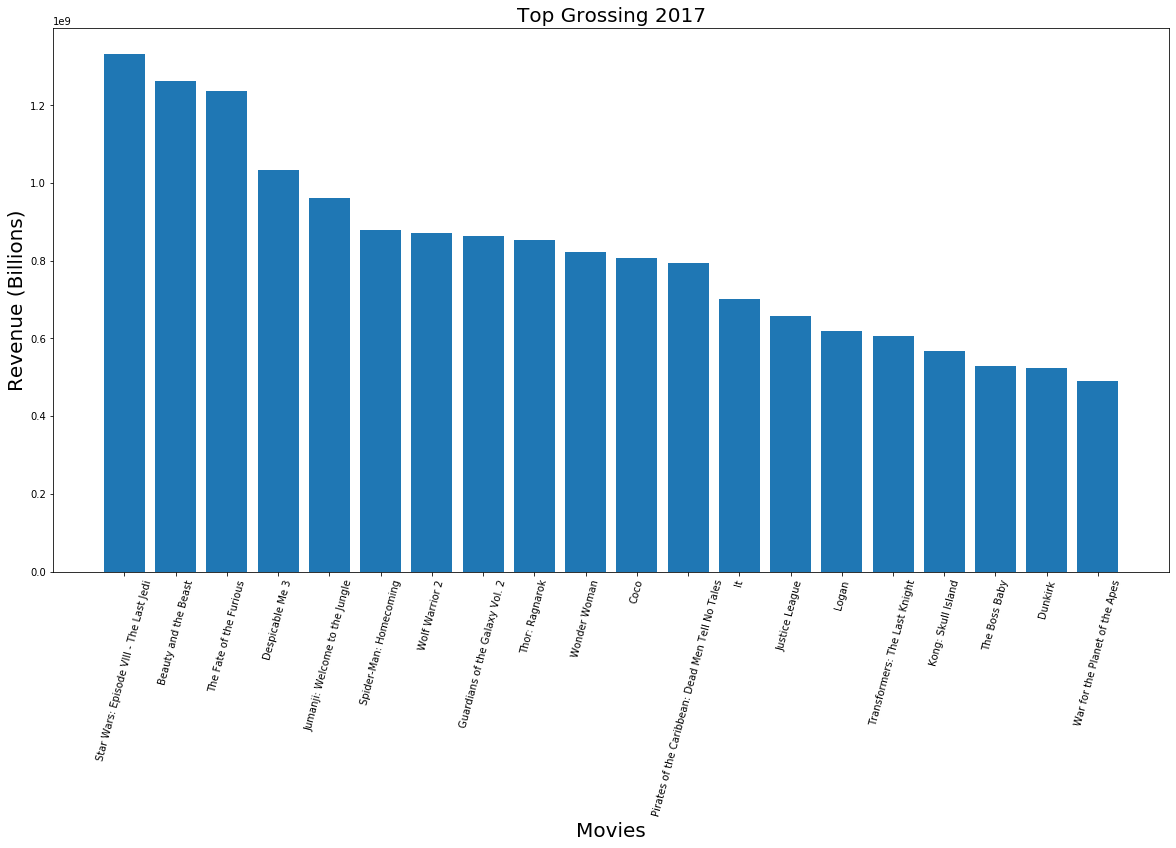

In [146]:
#2017
x3 = df3[0][:20]
y3 = df3[1][:20]
plt.figure(figsize=(20,10))
plt.bar(x3,y3)
plt.xticks(rotation=75)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Revenue (Billions)', fontsize = 20)
plt.title('Top Grossing 2017', fontsize = 20)

Text(0.5, 1.0, 'Top Grossing 2018')

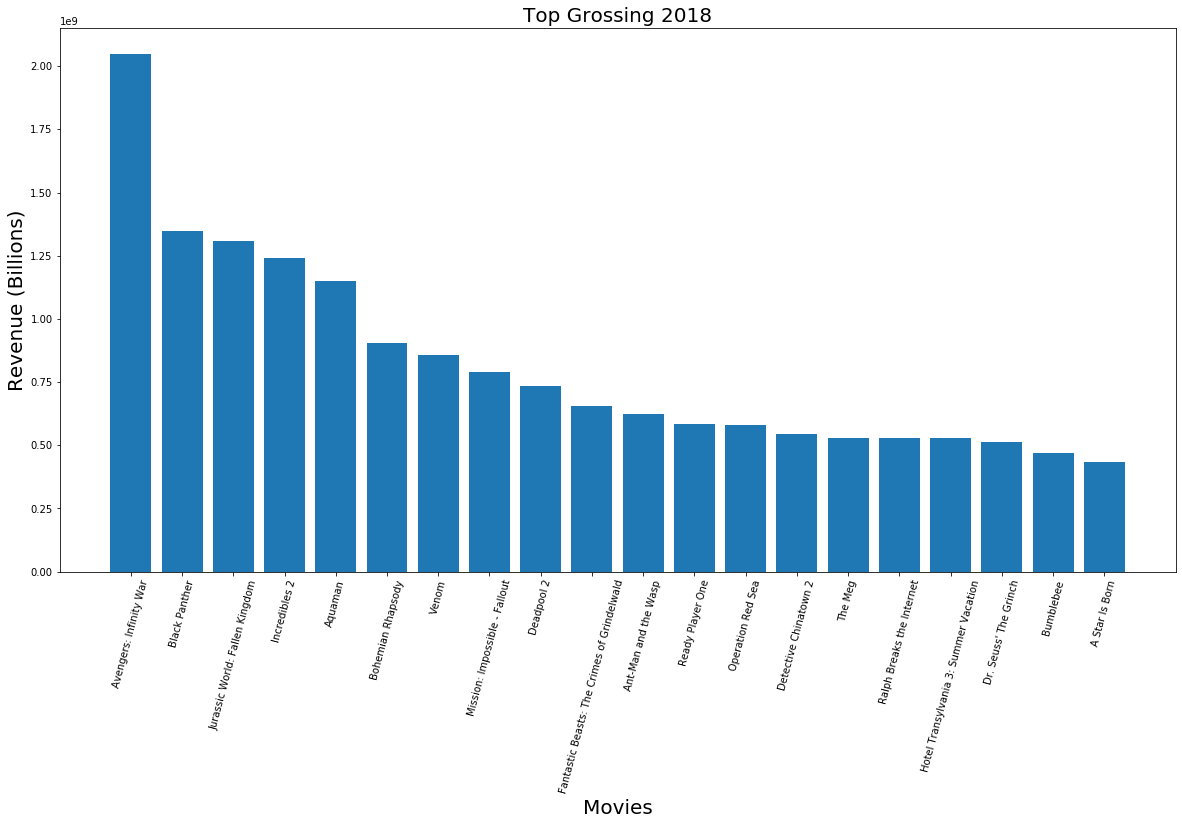

In [147]:
#2018
x4 = df4[0][:20]
y4 = df4[1][:20]
plt.figure(figsize=(20,10))
plt.bar(x4,y4)
plt.xticks(rotation=75)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Revenue (Billions)', fontsize = 20)
plt.title('Top Grossing 2018', fontsize = 20)


Text(0.5, 1.0, 'Top Grossing 2019')

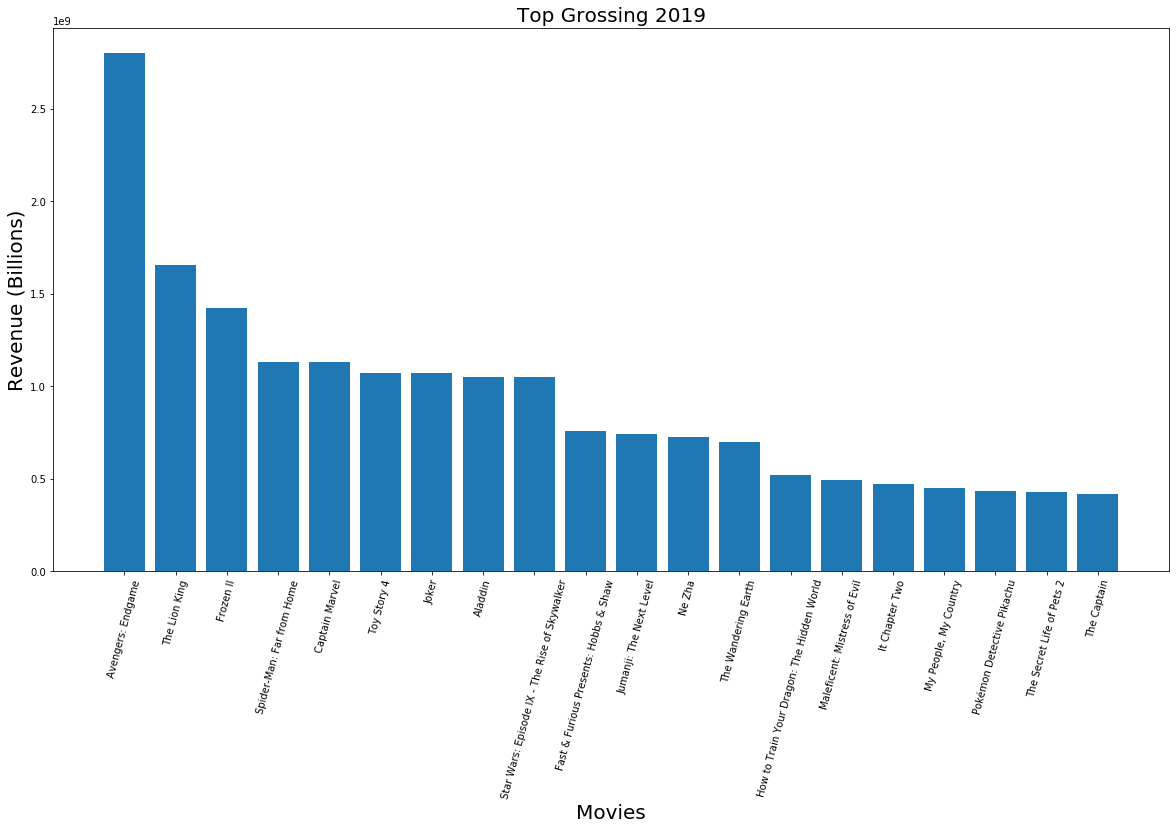

In [143]:
#2019
x5 = df5[0][:20]
y5 = df5[1][:20]
plt.figure(figsize=(20,10))
plt.bar(x5,y5)
plt.xticks(rotation=75)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Revenue (Billions)', fontsize = 20)
plt.title('Top Grossing 2019', fontsize = 20)


In [142]:
genres

NameError: name 'genres' is not defined

CREATING THE DB


In [ ]:
#CREATE DB
#CONNECT TO DB
cnx = mysql.connector.connect(
      host = config.my_cred['host'],
      user = config.my_cred['user'],
      passwd = config.my_cred['pw']
)

cursor = cnx.cursor()

#DB NAME

db_name = 'REV_DB'

In [ ]:
#CREATE DB'

def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)

In [ ]:
create_database(cursor, db_name)

In [ ]:
#check to see if database is created already
try:
    cursor.execute("USE {}".format(db_name))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name
    else:
        print(err)
        exit(1)

In [ ]:
#CREATE TABLE
cursor.execute("""USE REV_DB""")
TABLES = {}
TABLES['movie_rev'] = (
    "CREATE TABLE movie_rev ("
    "  id INT NOT NULL AUTO_INCREMENT,"
    "  name varchar(255),"
    "  revenue int(10),"
    "  PRIMARY KEY (id)"
    ") ENGINE=InnoDB")



In [14]:
TABLES['movie_rev']

NameError: name 'TABLES' is not defined

In [ ]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

cursor.close()
cnx.close()

In [15]:
cnx = mysql.connector.connect(
      host = config.my_cred['host'],
      user = config.my_cred['user'],
      passwd = config.my_cred['pw'],
      database = 'REV_DB'
)

cursor = cnx.cursor()
def db_insert_movies(cnx, cursor, movies):
#     cursor.execute("""USE REV_DB""")
    stmt = "INSERT INTO movie_rev (name, revenue) VALUES (%s, %s)"
    cursor.executemany(stmt, movies)
    cnx.commit()


In [20]:
db_insert_movies(cnx, cursor, top_100_2015)

In [21]:
df

NameError: name 'df' is not defined